In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import numpy as np

In [18]:
import geopandas as gpd

In [31]:
from os.path import join

In [32]:
SHAPE = "../shape/"

# Outlook

Here we create plots of different nature to reflect the quality of the data obtained from OSM. The aim is to get a list of attributes to be used to map into the shapefiles and to create the networks with.

Data consists of node points, geographical coordinates containing a key and value tags with the information of the underlying data point.

In [2]:
OSM = '/Users/rdora/Downloads/osm.csv'

In [29]:
# Lista de municipios a tomar en cuenta
municipios = np.genfromtxt("../data/municipios.txt", delimiter='\n',
                          dtype='unicode')

In [9]:
# Load the data
df = pd.read_csv(OSM)

## General look of data

Load the data from the shapefiles. Then plot it and scatter plot the OSM data points on top.

In [35]:
# Load shapefiles
fp = join(SHAPE, 'nuevo_leon.shp')

map_df = gpd.read_file(fp, encoding='utf-8')
map_df = map_df[map_df['MUN_NAME'].isin(municipios)]

In [40]:
sns.scatterplot?

In [45]:
df[df.tag_key=='amenity'].shape

(35742, 8)

In [63]:
df[df.tag_key=='highway']['tag_value'].unique()

array(['primary_link', 'primary', 'footway', 'steps', 'trunk', 'tertiary',
       'secondary', 'trunk_link', 'residential', 'secondary_link',
       'motorway', 'motorway_link', 'unclassified', 'service',
       'tertiary_link', 'pedestrian', 'track', 'road', 'living_street',
       'path', 'bus_guideway', 'bridleway', 'construction', 'proposed',
       'residential_link', 'cycleway', 'escape', 'rest_area', 'raceway',
       'bus_stop', 'services'], dtype=object)

In [70]:
pal = sns.color_palette("hls", 9)

In [96]:
main_roads = ['motorway', 'trunk',
              'primary']

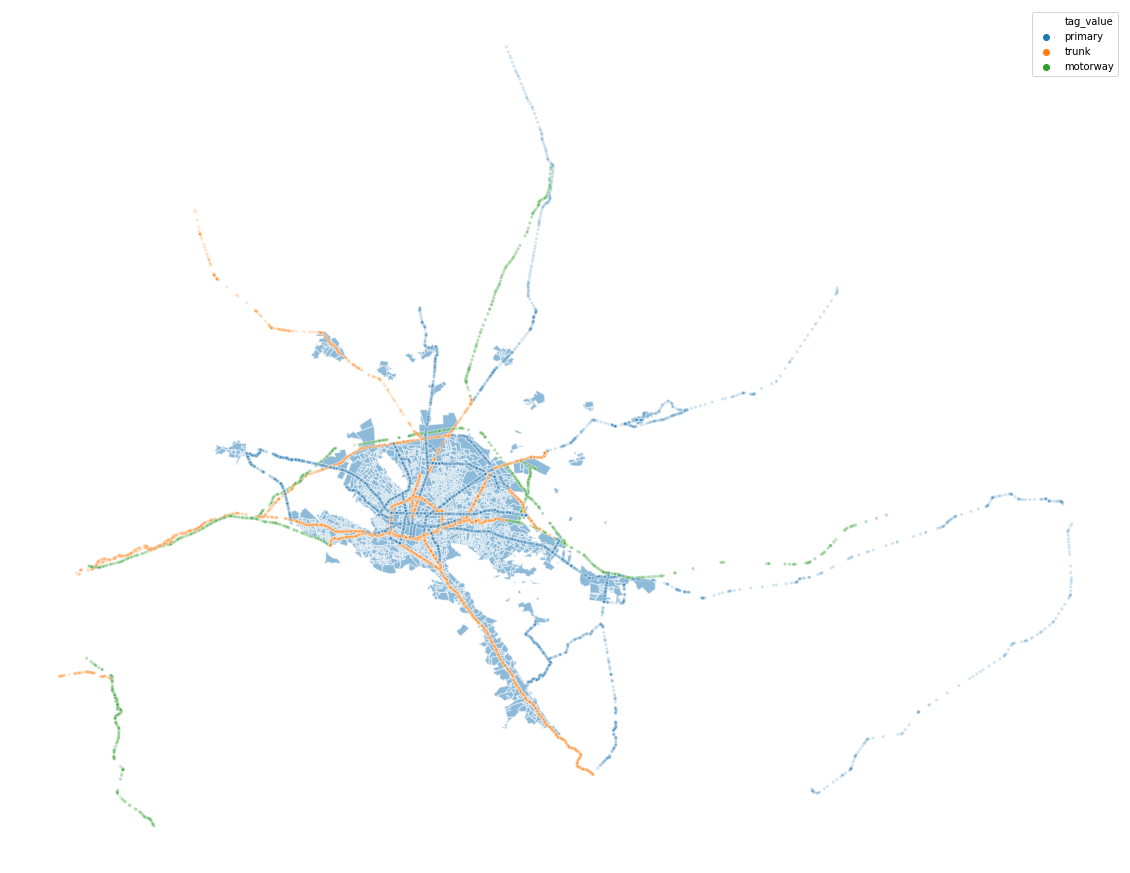

In [97]:
df_filter = df[df.tag_value.isin(main_roads)]

# Plot the points on the map

fig, ax = plt.subplots(figsize=(20, 20))
ax.axis('off')
map_df.plot(ax=ax, alpha=0.5, edgecolor='white')
sns.scatterplot(x='lon', y='lat', hue='tag_value', data=df_filter, s=10, alpha=0.2,
               ax=ax)

## Amenities, shops and leisure spots in Monterrey

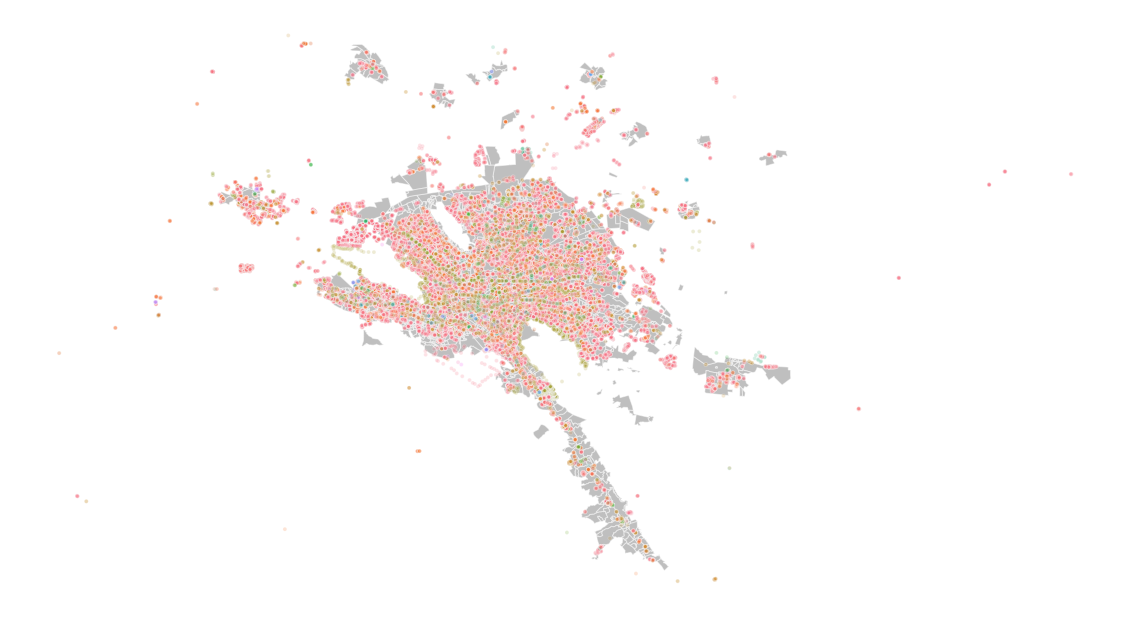

In [122]:
df_filter = df[df.tag_key!='highway']

# Plot the points on the map

fig, ax = plt.subplots(figsize=(20, 20))
ax.axis('off')
map_df.plot(ax=ax, alpha=0.5, edgecolor='white', facecolor='gray')
sns.scatterplot(x='lon', y='lat', hue='tag_value', data=df_filter, s=15, alpha=0.2,
               ax=ax, legend=False)

## Get neighborhood